In [1]:
# General
import pandas as pd
import numpy as np
import re

# Plotting
import seaborn as sns
import matplotlib.pyplot as plt

# Gensim
import gensim
from gensim.utils import simple_preprocess

# NLTK
import nltk
from nltk.corpus import stopwords

from collections import Counter
from wordcloud import WordCloud

import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
# nltk
import nltk
from nltk.corpus import wordnet as wn
from nltk.corpus import words
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.stem.porter import *
from nltk.stem import LancasterStemmer

In [3]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [4]:
import nltk
nltk.download
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [5]:
df = pd.read_csv('scraped_tweets.csv')
df.head(5)

,Unnamed: 0,date,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags
0,0,2022-06-26 16:40:18,GSimandiras,NaN,NaN,78,22,1878,0,#VMware #Dell Starting with one of the most im...,"['VMware', 'Dell']"
1,1,2022-06-26 16:36:23,furrier,Cofounder Co-CEO SiliconANGLE Media theCUBE; ...,"Palo Alto, California",11011,25736,61917,3,Don’t miss this new series detailing major on-...,[]
2,2,2022-06-26 16:31:24,shikimoriG213,17(will become 18 this year)\n\n🖥️Setup Builde...,NaN,27,0,1,0,got shiki-rolled when I want to waking up my P...,"['pc', 'pcsetup', 'desksetup', 'rgb', 'lightsy..."
3,3,2022-06-26 16:14:33,DigitalTrends,Tech for the way we live. | TikTok & Instagram...,"Portland, OR && New York, NY",267,2007732,200513,0,The #Dell #Inspiron 14 2-in-1 offers OK produc...,"['Dell', 'Inspiron']"
4,4,2022-06-26 16:12:29,dvellante,"Entrepreneur, Analyst, Writer, Cofounder & Co-...",Boston,5865,12011,25122,3,Don’t miss this new series detailing major on-...,[]


**Convert tweets to string**

In [6]:
 df["text"] = df["text"].apply(str)

In [7]:
warnings.simplefilter('ignore')

# NLTK Stop words 
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
## Removing stop words, punctuation and tokenizing
number = 2500
stop  = stopwords.words('english')
stop.extend(map(str, range(number + 1)))

In [9]:
def clean_text_split(text):
        '''
        Utility function to clean Sentence text by removing links, special characters
        using simple regex statements.
        '''
        p = ' '.join(re.sub("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)", " ", text).split())
        s = ' '.join(re.sub("(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9_]+)", " ", p).split())
        return ' '.join(re.sub("(\w+:\/\/\S+)", " ", s).split())

In [10]:
def get_mentions(text):
        '''
        Utility function to clean Sentence text by removing links, special characters
        using simple regex statements.
        '''
        result = re.findall("(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9_]+)", text) #(@[A-Za-z0-9]+)|
        return list(set(result))

In [11]:
def get_hashtags(text):
        '''
        Utility function to clean Sentence text by removing links, special characters
        using simple regex statements.
        '''
        result = re.findall("(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9_]+)", text) #(@[A-Za-z0-9]+)|
        return list(set(result))

In [12]:
def remove_links(text):
        '''
        Utility function to clean Sentence text by removing links, special characters
        using simple regex statements.
        '''
        return ' '.join(re.sub("(\w+:\/\/\S+)", " ", text).split())

In [13]:
# function for lemmatization

lemma = nltk.wordnet.WordNetLemmatizer()
def lemmatize(text):
    return lemma.lemmatize(text)

In [14]:
#Create separate colums for mentions, tags, tokens and process the tokens
df["mentions"] = df["text"].apply(lambda text: get_mentions(text))
df["tags"] = df["text"].apply(lambda text: get_hashtags(text))

df["text_clean"] = df["text"].apply(lambda text: clean_text_split(text))

df["text_tokens"] = df["text_clean"].apply(lambda each_post: word_tokenize(re.sub(r'[^\w\s]',' ',each_post.lower())))
df["text_tokens"] = df["text_tokens"].apply(lambda list_of_words: [x for x in list_of_words if x not in stop])

df["text_tokens_lem"] = df["text_tokens"].apply(lambda list_of_words: [lemmatize(x) for x in list_of_words])

In [15]:
## Removing Less Frequent words
df["text_new"] = df["text"].apply(lambda text: remove_links(text))
df["text_new"] = df["text_new"].apply(lambda each_post: word_tokenize(re.sub(r'[^\w\s]',' ',each_post.lower())))
df["text_new"] = df["text_new"].apply(lambda list_of_words: [x for x in list_of_words if x not in stop])

Next we generate some general **Descriptive Statistics for each Sentence in our Dataset**:

In [16]:
count = df['text'].str.split().str.len()
count.index = count.index.astype(str) + ' words:'
count.sort_index(inplace=True)

In [17]:
print("Total number of words:", count.sum(), "words")

Total number of words: 17049 words


In [18]:
print("Mean number of words per Tweet:", round(count.mean(),2), "words")

Mean number of words per Tweet: 28.42 words


In [19]:
df['text_length'] = df['text'].str.len()
print("Total length of the dataset is:", df.text_length.sum(), "characters")

Total length of the dataset is: 129636 characters


In [20]:
print("Mean Length of a Tweet is:", round(df.text_length.mean(),0), "characters")
df = df.drop(['text_length'], axis=1)

Mean Length of a Tweet is: 216.0 characters


In [21]:
# Join the Sentence back together
def rejoin_words(row):
    words = row['text_new']
    joined_words = (" ".join(words))
    return joined_words

In [22]:
df['text']= df.apply(rejoin_words, axis=1)

In [23]:
all_words = ' '.join([text for text in df['text_clean']])

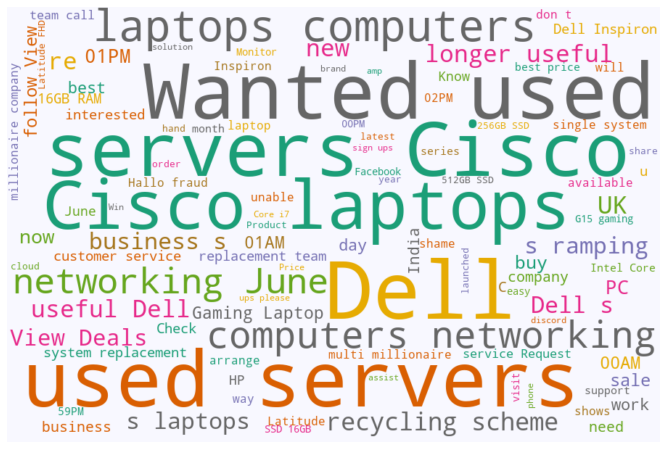

In [24]:
wordcloud = WordCloud(width=900, height=600, random_state=21, max_font_size=110, background_color='ghostwhite', 
                      max_words=100,colormap='Dark2').generate(all_words)

plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [25]:
df["text_length"] = df["text"].str.len()
df["cleaned_text_length"] = df["text_new"].str.len()
d_lengths = df[['text_length', 'cleaned_text_length']]

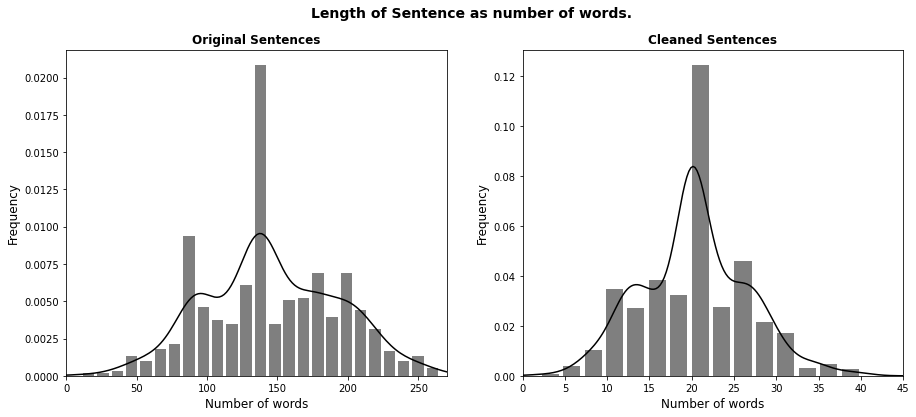

In [26]:
x_1 = d_lengths.text_length
x_2 = d_lengths.cleaned_text_length
plt.figure(figsize=(15,6))
plt.suptitle('Length of Sentence as number of words.', fontsize=14, fontweight="bold")
plt.subplot(1,2,1)
sns.distplot(x_1, color="black", label="No. Words", bins=25, hist_kws={"alpha": 0.5,"rwidth":0.8})
plt.title("Original Sentences",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,270])



# Chart 2: Derivative Function
plt.subplot(1,2,2)
sns.distplot(x_2, color="black", label="No. Words", bins=15, hist_kws={"alpha": 0.5, "rwidth":0.8})
plt.title("Cleaned Sentences",fontsize=12, fontweight="bold")
plt.xlabel("Number of words", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim([0,45])

plt.show()

**Top 25 Most frequent Words**


In [27]:
word_freq = pd.Series(np.concatenate([x.split() for x in df['text_new'].apply(str)])).value_counts()

In [28]:
word_df = pd.Series.to_frame(word_freq)
word_df['word'] = list(word_df.index)
word_df.reset_index(drop=True, inplace=True)
word_df.columns = ['freq', 'word']

Unique words: 2748


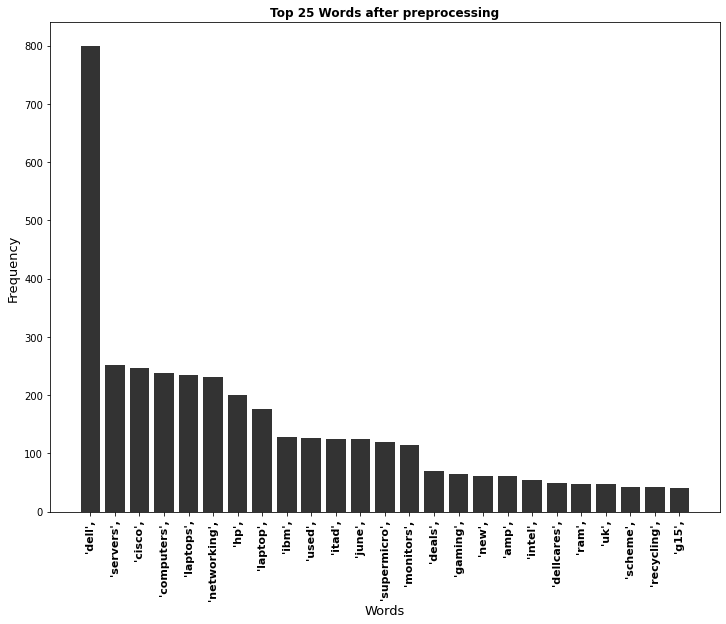

In [31]:
label = word_df['word'].head(25)
freq = word_df['freq'].head(25)
index = np.arange(len(freq))

print("Unique words:", len(word_df))
plt.figure(figsize=(12,9))
plt.bar(index, freq, alpha=0.8, color= 'black')
plt.xlabel('Words', fontsize=13)
plt.ylabel('Frequency', fontsize=13)
plt.xticks(index, label, fontsize=11, rotation=90, fontweight="bold") 
plt.title('Top 25 Words after preprocessing', fontsize=12, fontweight="bold")
plt.show()

In [32]:
df

,Unnamed: 0,date,username,description,location,following,followers,totaltweets,retweetcount,text,hashtags,mentions,tags,text_clean,text_tokens,text_tokens_lem,text_new,text_length,cleaned_text_length
0,0,2022-06-26 16:40:18,GSimandiras,NaN,NaN,78,22,1878,0,vmware dell starting one important security co...,"['VMware', 'Dell']",[],"[Dell, VMware]",Starting with one of the most important securi...,"[starting, one, important, security, controls,...","[starting, one, important, security, control, ...","[vmware, dell, starting, one, important, secur...",208,28
1,1,2022-06-26 16:36:23,furrier,Cofounder Co-CEO SiliconANGLE Media theCUBE; ...,"Palo Alto, California",11011,25736,61917,3,miss new series detailing major prem amp cloud...,[],"[MasSubestimado, furrier, dvellante]",[Dell],Don’t miss this new series detailing major on-...,"[miss, new, series, detailing, major, prem, am...","[miss, new, series, detailing, major, prem, am...","[miss, new, series, detailing, major, prem, am...",220,35
2,2,2022-06-26 16:31:24,shikimoriG213,17(will become 18 this year)\n\n🖥️Setup Builde...,NaN,27,0,1,0,got shiki rolled want waking pc lol pc pcsetup...,"['pc', 'pcsetup', 'desksetup', 'rgb', 'lightsy...",[],"[shikimori, shikimorisnotjustacutie, pc, dell,...",got shiki-rolled when I want to waking up my P...,"[got, shiki, rolled, want, waking, pc, lol]","[got, shiki, rolled, want, waking, pc, lol]","[got, shiki, rolled, want, waking, pc, lol, pc...",176,24
3,3,2022-06-26 16:14:33,DigitalTrends,Tech for the way we live. | TikTok & Instagram...,"Portland, OR && New York, NY",267,2007732,200513,0,dell inspiron offers ok productivity performan...,"['Dell', 'Inspiron']",[],"[Dell, Inspiron]",The 14 2-in-1 offers OK productivity performan...,"[offers, ok, productivity, performance, displa...","[offer, ok, productivity, performance, display...","[dell, inspiron, offers, ok, productivity, per...",76,10
4,4,2022-06-26 16:12:29,dvellante,"Entrepreneur, Analyst, Writer, Cofounder & Co-...",Boston,5865,12011,25122,3,miss new series detailing major prem amp cloud...,[],"[MasSubestimado, furrier, dvellante]",[Dell],Don’t miss this new series detailing major on-...,"[miss, new, series, detailing, major, prem, am...","[miss, new, series, detailing, major, prem, am...","[miss, new, series, detailing, major, prem, am...",220,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,595,2022-06-21 06:30:07,Dell_IN,Welcome to the official Twitter page of Dell I...,India,1528,83217,27861,0,inspiron get pretty flexible recommend stretch...,"['InternationalYogaDay', 'Dell', 'DellIndia', ...",[],"[Inspiron2in1, Dell, DellIndia, Yoga, Internat...",While your Inspiron 2-in-1 can get pretty flex...,"[inspiron, get, pretty, flexible, recommend, s...","[inspiron, get, pretty, flexible, recommend, s...","[inspiron, get, pretty, flexible, recommend, s...",165,21
596,596,2022-06-21 06:20:32,best_it_deal,We are Distributor of Multi Brands Laptop and ...,"New Delhi, india",5,4,88,0,international yoga day dell laptop dell gaming...,"['dell', 'gamingpc', 'gaminglaptop', 'gamingco...",[],"[gamingfolk, gamingchair, gaminglaptop, gaming...",International Yoga day with Dell Laptop,"[international, yoga, day, dell, laptop]","[international, yoga, day, dell, laptop]","[international, yoga, day, dell, laptop, dell,...",251,24
597,597,2022-06-21 06:06:28,shivi_chauhan,I fight anxiety through my words here. 🎭💫🦋,Lost in a sea of passion 🇮🇳,96,734,2126,0,laptop sale dell inspiron 3576 i3 7th gen 4gb ...,"['laptop', 'dell']",[],"[laptop, dell]","Laptop for sale Dell Inspiron 3576 I3, 7th gen...","[laptop, sale, dell, inspiron, 3576, i3, 7th, ...","[laptop, sale, dell, inspiron, 3576, i3, 7th, ...","[laptop, sale, dell, inspiron, 3576, i3, 7th, ...",78,15
598,598,2022-06-21 05:16:05,lappyfy,"25 years business experience in best laptops,d...",Delhi,170,43,923,0,international yoga day connect us facebook lap...,"['lappyfy', 'gyancomputers', 'gyaneshtech', 'g...",[],"[gyan

In [33]:
df['text_Preprocessed'] = df['text_new'].str.join(' ')

In [34]:
df = df.drop(labels=['text', 'mentions','tags','text_clean','text_tokens','text_tokens_lem','text_new','text_length','cleaned_text_length'], axis=1)

In [35]:
 df = df.drop(labels=['username', 'description','location','following','followers','totaltweets','retweetcount','hashtags'],axis=1)

In [36]:
 df = df.drop(labels=['Unnamed: 0'],axis=1)

In [37]:
df.rename(columns = {'text_Preprocessed' : 'Sentenece'}, inplace = True)

In [38]:
df.head()

,date,Sentenece
0,2022-06-26 16:40:18,vmware dell starting one important security co...
1,2022-06-26 16:36:23,miss new series detailing major prem amp cloud...
2,2022-06-26 16:31:24,got shiki rolled want waking pc lol pc pcsetup...
3,2022-06-26 16:14:33,dell inspiron offers ok productivity performan...
4,2022-06-26 16:12:29,miss new series detailing major prem amp cloud...


**Save Dataframe**

Lastly we save the pre-processed dataframe as a pickle, which is then used for Sentiment Analysis phase. That concludes the pre-processing phase of the analysis.


In [39]:
df.to_pickle('pre-processed_finance_tweets.pkl')